# Navigation: Map-based Planning

## Getting started
We have to install a few things:
* The robotics toolbox (comment if you already installed it)
* pgraph, a library to work with graphs
* Some costum scripts and data

**DO:**
* Run the next cells

In [1]:
# Installations
# Robotics Toolbox Python
# !pip install roboticstoolbox-python


In [2]:
# # P-graph (This will download the code in the current directory. Change location, if you prefer)
# !git clone https://github.com/petercorke/pgraph-python.git
# %cd pgraph-python
# !pip install -e .


In [3]:

# import wget
# import os
# import zipfile
# list_url = ["https://git.wur.nl/koots006/msc_course_robotics/raw/main/tutorials/t06/scripts.zip","https://git.wur.nl/koots006/msc_course_robotics/raw/main/tutorials/t06/data.zip"]
# location = os.getcwd()
# for url in list_url:
#     # url = "https://git.wur.nl/koots006/msc_course_robotics/raw/main/tutorials/t06/scripts.zip"
#     filename = wget.download(url, location)
#     with zipfile.ZipFile(filename,'r') as zip_ref:
#         zip_ref.extractall(location)
#     # removes all of the zipfiles...
#     os.remove(filename)

In [4]:
# !wget https://git.wur.nl/koots006/msc_course_robotics/raw/main/tutorials/t06/scripts.zip
# !wget https://git.wur.nl/koots006/msc_course_robotics/raw/main/tutorials/t06/data.zip
# !unzip scripts.zip
# !unzip data.zip

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (12.0, 9.0)

## 0: Creating a map

The first thing we need for map-based navigation is a map. In mobile robotics, a map is often built as the robot explores it environment. However, for the purpose of this tutorial, we assume that the map of the environment is known. We will generate a map manually.

### 0.1. Polygon map

One way to represent a map is using polygons. We can generate a map with regularly and irregularly shaped polygons to denote obstacles. The space inside the polygons is considered occupied and the space outside is considered free. The robot can navigate in the free space.  
A Polygon map can be created using the [PolyMap](https://petercorke.github.io/robotics-toolbox-python/mobile_planner.html?highlight=polygonmap#roboticstoolbox.mobile.PolygonMap) class from the [Robotics Toolbox](https://petercorke.github.io/robotics-toolbox-python/intro.html).  

**Exercise:**
* Your task here is to generate a simple PolygonMap as shown below. In the two code blocks below, you see an example of adding one polygon to the map. Add also the second polygon to create the map.
![image](data/PolygonMap.png)

In [6]:
# Imports
from scripts.OccGrid import PolygonMap

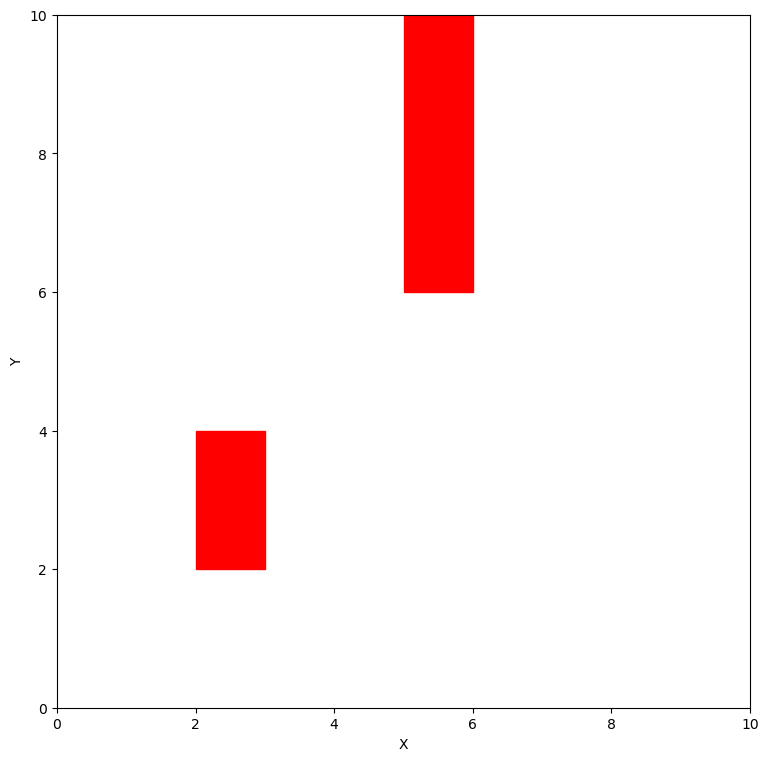

In [7]:
# Create polygonal obstacles
poly_map = PolygonMap(workspace=[0, 10], polygons=[])

# Add a polygon
poly_map.add([(5, 10), (5, 6), (6, 6), (6, 10)]) 

'''Use the 'add' function to insert appropriate polygons'''
### Add your code here ###
#### THE ORDER OF THE POINTS MATTERS BECAUSE THAT IS HOW THEY ARE
poly_map.add([(2,4), (2, 2),(3, 2), (3, 4)]) 
# raise NotImplementedError
### ------------------ ###

print(poly_map)
poly_map.plot()


### 0.2. Occupancy grid simple

A more popular representation of a map is an occupancy grid. An occupancy grid is a matrix that corresponds to a region of 2-dimensional space. Elements containing zeros are free space where the robot can move, and those with ones are obstacles where the robot cannot move.  
An occupancy grid can be created using the [BinaryOccupancyGrid](https://petercorke.github.io/robotics-toolbox-python/mobile_planner.html?highlight=polygonmap#roboticstoolbox.mobile.BinaryOccupancyGrid) class.  

**Exercise:**
* Your task here is to create the same map as above, but as an occupancy grid. A 11x11 numpy array `simple_array` is created containing only zero values. Using slicing, you can put some cells to 1, for instance `simple_array[3:5, 5:7]` will set the ceels in row 3-4 and column 5-6 to 1. Finish the code below to create the same map as produced above using the polygons.

In [8]:
# Imports
from scripts.OccGrid import BinaryOccupancyGrid

[[1. 1.]
 [1. 1.]
 [1. 1.]]
BinaryOccupancyGrid: 11 x 11, cell size=1, x = [0.0, 10.0], y = [0.0, 10.0], 13.2% occupied


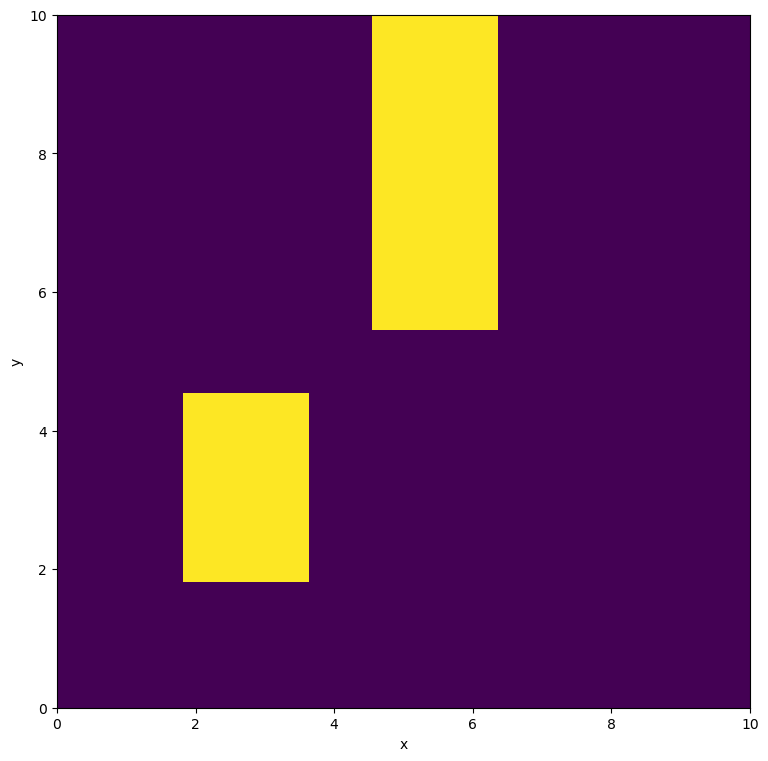

In [9]:
# Create an empty map array
simple_array = np.zeros((11,11))
"""
[
[0,0,0,0,0,0,0,0,0,0,0]
[]
]
"""
### Add your code here ###

'''
Add appropriate indices to create the desired map
We assign the value 1 to cells where the obstacles are
'''
# seems to be opposite of what was stated...d
simple_array[2:5,2:4] = 1 # rows 2-3 and columns 2-4 for object 1
print(simple_array[2:5,2:4])
simple_array[6:11,5:7] = 1 # rows 5-6 and columns 6 to 10 for object 2s
'''Create an binary occupancy grid using the above map as input'''
og_map_sim = BinaryOccupancyGrid(simple_array)

# raise NotImplementedError
### ------------------ ###

print(og_map_sim)
og_map_sim.plot()

### 0.3. Occupancy grid complex

Creating a large map manually (like above) is tedious. We can also load maps that have been created in, for instance, a mat or csv file. Here, we will use a mat file with two fields. The `floorplan` fields consists of the occupancy information and the `places` fields consists of pre-defined locations in the map that denote different places in the map.  

**Exercise:**
* The code below loads the file `data/house.mat` and takes the `floorplan`, which is a numpy array
* Use `floorplan` and the function `BinaryOccupancyGrid(..)` to create a binary occupancy grid `og_map` and show it, as done in the previous exercise.
* Print the information in `house['places']`and see if you can locate some of the rooms in the map

In [10]:
#NB. If the import of scipy fails, you need to install SciPy using
# !pip install scipy

# Imports
import scipy.io

In [11]:
# ORIGINAL PYTHON VERSION FOR WEBOTS>..

##C:\Users\lkrow\AppData\Local\Programs\Python\Python37\python.exe
# CONDA VERSION WEBOTS IS WORKING!

BinaryOccupancyGrid: 596 x 397, cell size=1, x = [0.0, 595.0], y = [0.0, 396.0], 8.8% occupied
[320 190]


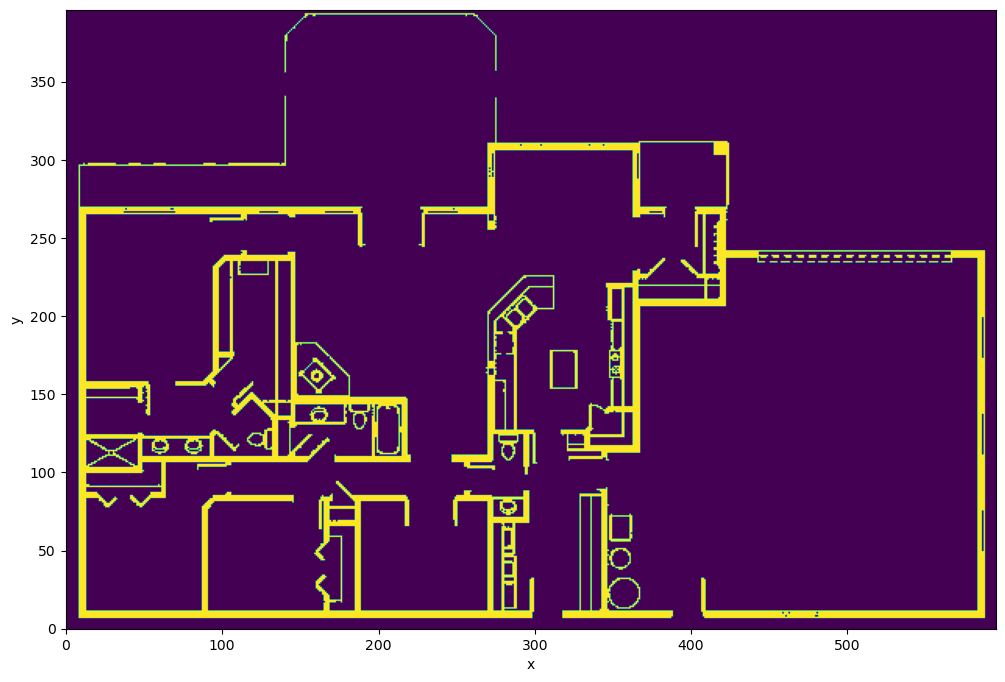

In [12]:

# Load map array
house = scipy.io.loadmat("data/house.mat", simplify_cells=True)
floorplan = house['floorplan']

'''Call the BinaryOccupancyGrid function to create an occupancy grid map'''
### Add your code here ###
og_map= BinaryOccupancyGrid(floorplan)
print(og_map)
print(house['places']['kitchen'])
og_map.plot()
# raise NotImplementedError


You now know how to get a(n) (occupancy) map of an environment. Remember that the cells in the map with a value of 0 represent empty space and the cells with 1 are occupied space (walls, objects, etc). We will now look at planners that plan a path to navigate through the unoccupied space to get the robot from the current position to a goal position.  



### 0.4. A simple reactive robot navigating the map

The simplest planner is a reactive planner. We start with the *bug2* controller, which is a simple reactive controller that performs goal seeking in the presence of non-drivable areas of obstacles. It is somewhat related to the *Braitenberg* vehicle, but but contains a bit more complex logic including a state machine and some memory. Nonetheless, it navigates an environment very naively, by planning a path straight to goal position, then following this path until an obstacle is encountered. It will then follow the contour of the obstacle until it is back on the straight path.

NB. For the planners, we assume that  
* the robot operates in a grid world and occupies one grid cell.
* the robot is capable of omnidirectional motion and can move to any of its eight neighboring grid cells. 
* it is able to determine its position on the map, which is a nontrivial problem that will be discussed in later tutorials on localization

**Run:**
* For all planners in this tutorial, we will use two maps, one simple map `og_map_sim` and a real map of the house `og_map`. Run the code below, so that you have both maps:

In [13]:
# Creating a simple and small map
simple_array = np.zeros((21,21))
simple_array[:,0] = 1
simple_array[:,-1] = 1
simple_array[0,:] = 1
simple_array[-1,:] = 1
simple_array[0:10, 5:7] = 1
simple_array[14:21, 5:7] = 1
simple_array[0:5, 13:15] = 1
simple_array[9:21, 13:15] = 1
simple_array[9:11, 14:17] = 1
og_map_sim = BinaryOccupancyGrid(simple_array)

# Loading the house map
house = scipy.io.loadmat("data/house.mat", simplify_cells=True)
floorplan = house['floorplan']
places = house['places']
og_map = BinaryOccupancyGrid(floorplan)

**Exercise:**
* In the code block below, the Bug2 reactive robot is navigated from the start position (2,2) to the goal position (18,12). Run the code to observe the resulting path. Based on that path, what is the control logic of the robot?
* Try a few different start and goal locations.  

In [14]:
from roboticstoolbox.mobile import Bug2

<Figure size 1200x900 with 0 Axes>

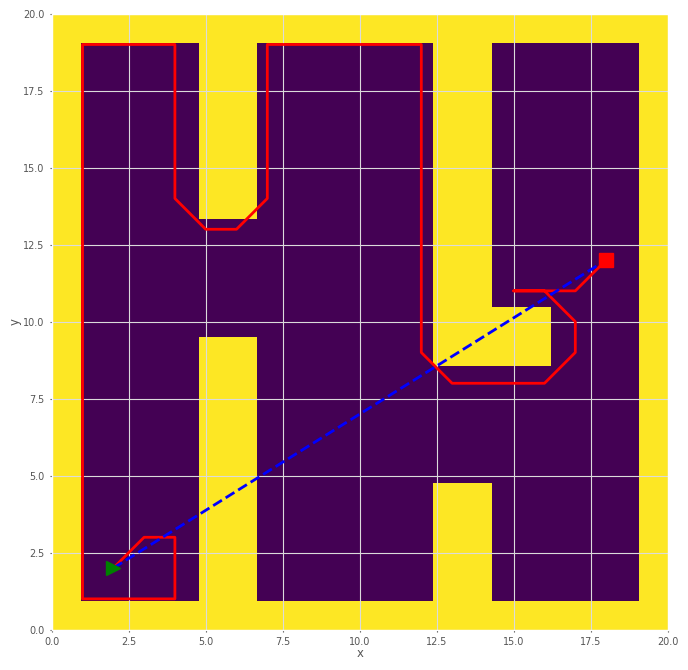

In [15]:
bug2 = Bug2(occgrid=og_map_sim.grid)
# Test different start and goal locations
## The points cannot be inside obstacles...
path = bug2.run(start=(2,2), goal=(18,12))
# Plot the map and the path
plt.clf()
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(path[:,0],path[:,1],'r-',linewidth=2)
ax.plot((path[0,0],path[-1,0]), (path[0,1],path[-1,1]), 'b--', linewidth=2)
ax.plot(path[0,0],path[0,1],'g>',markersize=10)
ax.plot(path[-1,0],path[-1,1],'rs',markersize=10)
og_map_sim.plot()
plt.show()

**Exercise:**
* In the code block below, a function is defined to calculate the length of the path. Use it a compare it to the length euclidean distance between start and end position. 
* Look at the map and define what the shortest path is to navigate from start to end position while avoiding the obstacles. how much longer is the path of Bug2?

In [16]:
def getPathLength(path):
  """
  Calculates the length of the
  path
  """
  length = 0.0
  for i in range(len(path)-1):
    length += np.sqrt( (path[i+1,0]-path[i,0])**2 + (path[i+1,1]-path[i,1])**2 )
  return(length)

In [17]:
"""
Calculated the length of the actual path

Then compared it to the euclidean distance between the given start and the end positions

"""
start = [2,2]
goal = [18,12]

eucl_dist = np.sqrt((goal[0]-start[0])**2 + (goal[1]-start[1])**2)
cost_dist = getPathLength(path)
print("Euclidean Distance:", eucl_dist)
print("Cost Distance:", cost_dist)

Euclidean Distance: 18.867962264113206
Cost Distance: 69.89949493661165


**Exercise:**
* Now use Bug2 on the house map `og_map` and navigate from `br3` to `kitchen`. 

<Figure size 1200x900 with 0 Axes>

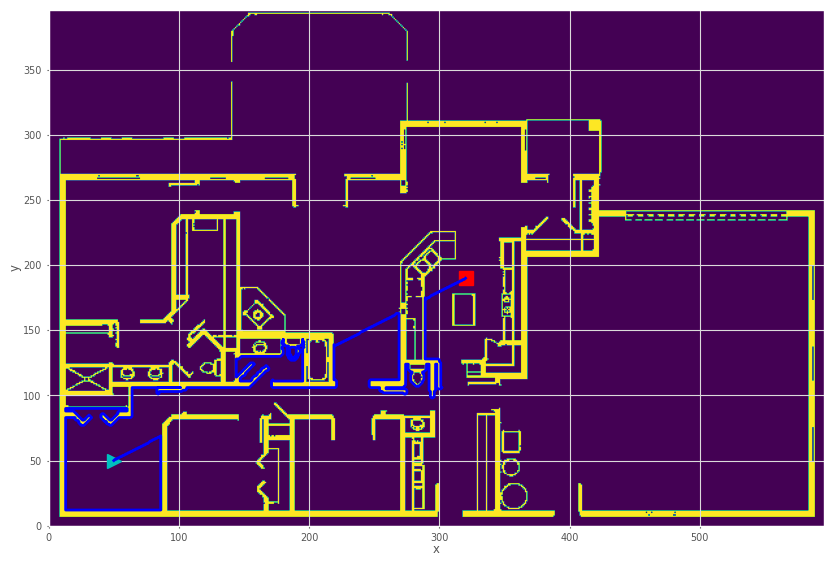

In [18]:
### ADD YOUR CODE HERE ###
# Array for kitchen
bug2 = Bug2(occgrid=og_map.grid)
kitchen = house['places']['kitchen']
# Array for Br3
Br3 = house['places']['br3']
# set the path from br3 as the start to the kitchen as the goal
path = bug2.run(start=(Br3[0],Br3[1]), goal=(kitchen[0],kitchen[1]))

plt.clf()
fig, ax = plt.subplots(figsize=(10,8))
# the start
ax.plot(path[0,0],path[0,1],'c>',markersize=10)
# the goal
ax.plot(path[-1,0],path[-1,1],'rs',markersize=10)
# all values from the 0 indx and all values from 1st index
ax.plot(path[:,0],path[:,1], 'b-',linewidth=2)
og_map.plot()



It is clear that the Bug2 logic is not the best way to navigate from a start to an end location. In the next, we will look at fice different path planners that plan a more efficient path through the environment:
1. Distance-transform planner
2. D* planner
3. Probabilistic roadmap method
4. Lattice planner
5. RRT planner

## 1: Distance transform planner

The distance-transform planner first calculates the distance transform for the map for a given goal location. The result is a distance map, which for every point in the image gives the distance (length of the shortest path) to the goal.

The distance map is calculated iteratively starting from the goal point. At this point, the distance is 0. The distances to all neighboring cells can then be set, 1 for the vertical and horizontal neighbors and $\sqrt{2}$ for the diagonal cells. In the next iteration, the distance can be calculated for the neighbors of the neighbors, etc. Whenever an obstacle is encountered, the distance is set to infinite. There are multiple paths to cells, so multiple distance values can be calculated. In that case, the minimum distance is kept.

To use the distance transform planner, we can use the [DistanceTransformPlanner](https://petercorke.github.io/robotics-toolbox-python/mobile_planner.html?highlight=polygonmap#roboticstoolbox.mobile.DistanceTransformPlanner) class.  

**Exercise:**
* Run the code below. It shows the iterative process of calculating the distance transform for the simple map. (NB. don'r run the animated version for the full map, as that takes a lot of time).
* Try a few different starting points in the `dtp.plan(...)` function.

In [19]:
# Imports
from scripts.DistanceTransformPlanner import DistanceTransformPlanner

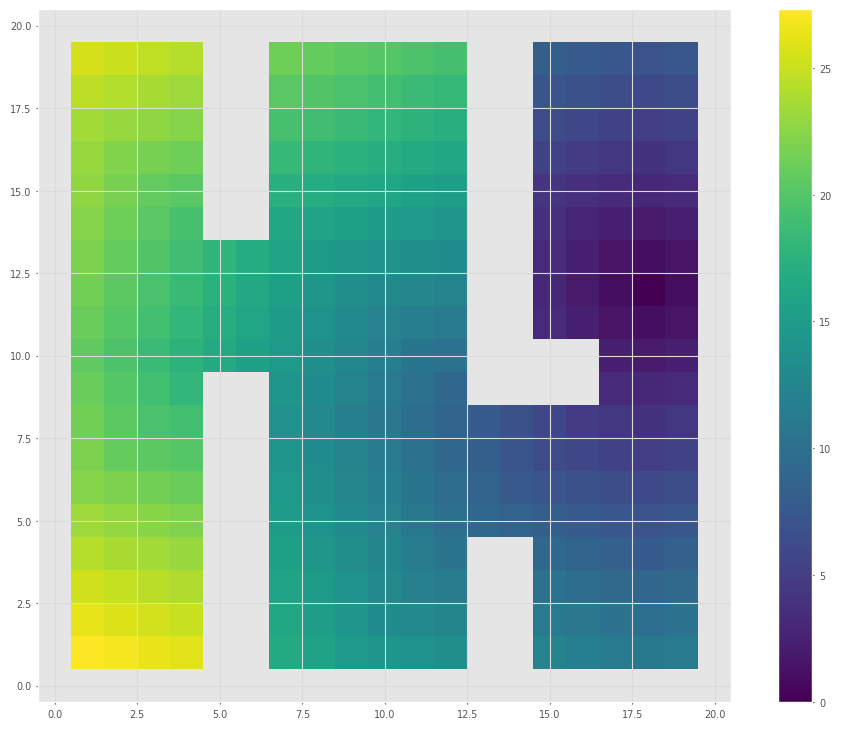

In [20]:
### Add your code here ###

"""
Distance map is calculated from the goal point
which is set to be zero
"""

# Create an instance of the distance transform planner
dtp = DistanceTransformPlanner(occgrid=og_map_sim, distance="euclidean")

# Compute the distance transform from a goal position
## got rid of animation

# goal is the starting location...
## can check different goals
dtp.plan(goal=(18,12), animate=False, animate_nb=False)
# Get the distance map
# Visualize the distance transform
dist_map = dtp.distancemap
plt.figure(figsize=(12,9))
plt.imshow(dist_map, origin='lower')
plt.colorbar()
plt.show()

This distance transform can then be used to plan a path from any given position in the map in an iterative way:
1. The current position is set to the start position
2. All 8 neighboring cells are checked and the cell with the lowest distance value is selected as the next position of the robot. Cells that contain obstacles are ignored.
3. Step 2 is repeated until position == end_position

This planner is performing **gradient descent** on the distance map.

**Exercise:**
* Run the code below to plan a path from the starting position $(2,2)$. The function `dtp.query(start)` plans and returns the path.
* Try for different start positions
* Try for different goal positions. Note that you need to now recalculate the distance map using `dtp.plan(goal)` as used above. Remove `animate=True, animate_nb=True` to not show the animation.
* Look at the resulting paths:
  * Does the planner provide the shortest path?
  * Does it plan a safe path if you look at the distance between the robot and obstacles?

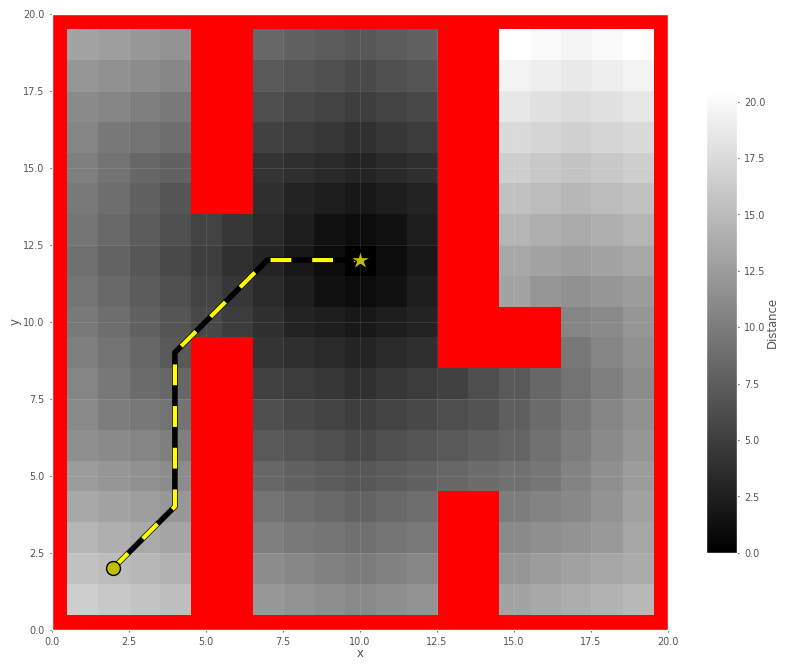

<Figure size 1200x900 with 0 Axes>

<AxesSubplot:xlabel='x (cells)', ylabel='y (cells)'>

In [21]:
# GOAL 1: 
dtp.plan(goal=(10,12), animate=False, animate_nb=False)

# Find a path from a start position to the goal position
## The starting position of the robot
## Aftering providing the startng position of the robot we then are able to get a path
#### TESTED FOR VARIOUS START POSITIONS
path = dtp.query(start=(2,2))

# Plot the distance map and the planned path
fig,ax = plt.subplots(figsize=(10,8))
dtp.plot(ax=ax, path=path)

So this does not seem to be a safe path although it does get to the target path efficiently. This is because of the fact that there is no real buffer betwen obstacel and path so it
tries to cut the corner and thus could be damaged.

Safer paths can be planned simply by inflating (dilating) the occupancy map. When inflated by a value of 1, all cells that are neigboring (N=4) an obstacle also become marked as obstacle. A path planned based on this inflated map, will have a distance of at least 1 from all obstacles. Where without inflating, the robot is assumed to be 1 cell big, with an inflation of 1, the size of the robot for planning is a circle with a diameter of 3 cells. 

**Exercise:**
* You can using inflation using<br>
```dtp = DistanceTransformPlanner(occgrid=og_map_sim, inflate = 1, distance="euclidean")```
* Use this and plan a path from $(2,2)$ to $(16,15)$ in the code block below.

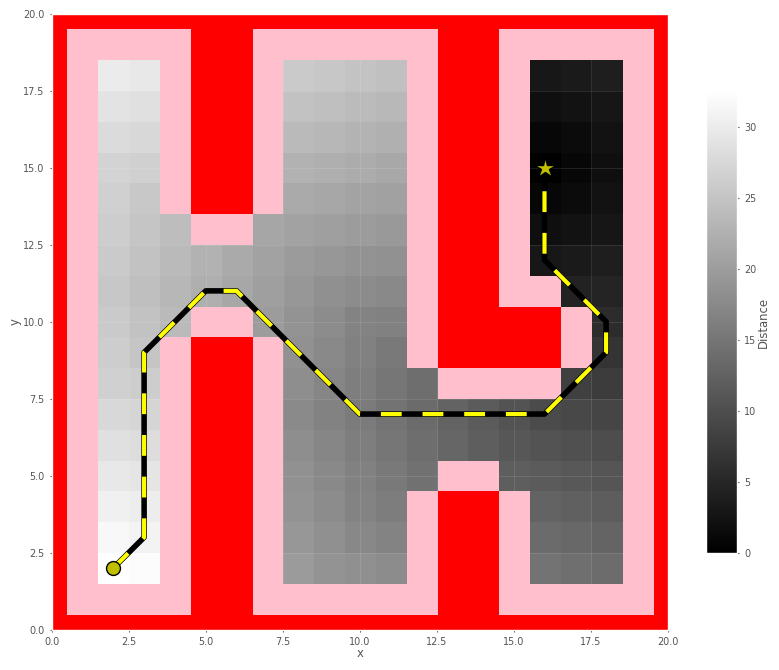

<Figure size 1200x900 with 0 Axes>

<AxesSubplot:xlabel='x (cells)', ylabel='y (cells)'>

In [22]:
"""
Distance Transform with Inflation

Add code to plan a path in an inflated occupancy map
plan a path from (2,2) to (16,15)
"""
dtp = DistanceTransformPlanner(occgrid=og_map_sim, inflate = 1,distance = "euclidean")

# plan the path
## goal is (16,15)
dtp.plan(goal=(16,15), animate=False, animate_nb=False)

# Query the starting location to get the path
path = dtp.query(start = (2,2))
# plotted the path
fig,ax = plt.subplots(figsize=(10,8))
dtp.plot(ax=ax, path=path)

In the above image we can see the buffer that was put in place protecting the robot from collision and making sure it is on the best path

**Exercise:**
* We will now use `og_map` with the floorplan of the house. Your task here is to plan a path from 'kitchen' to 'br3'. Note that you see blue cells in the map. These are cells for which no distance value could be calculated because they points are unreachable from the goal position


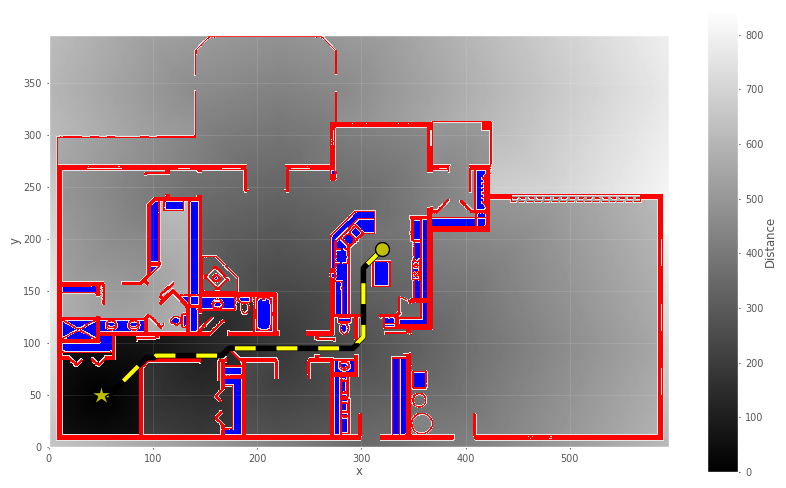

<Figure size 1200x900 with 0 Axes>

<AxesSubplot:xlabel='x (cells)', ylabel='y (cells)'>

In [23]:
'''
Create an instance of DistanceTransformPlanner and plan a path from 'kitchen' to 'br3'.
The pre-defined locations in the map are stored as a dictionary in the variable 'places'.
For example, you can access the location of kitchen using places['kitchen'].
'''
# the kitchen array
kitchen = house['places']['kitchen']
# Array for Br3
Br3 = house['places']['br3']

# Create an instance of the distance transform planner
## no inflation specified..
dtp = DistanceTransformPlanner(occgrid=og_map, distance="euclidean")

# Now set the plan
## goal is Br3
dtp.plan(goal=(Br3[0],Br3[1]), animate=False, animate_nb=False)

# Now got the path 
# # Query to add in the starting location as kitchen
## start is the kitchen
path = dtp.query(start = (kitchen[0],kitchen[1]))

# Plotted the path
fig,ax = plt.subplots(figsize=(10,8))
dtp.plot(ax=ax, path=path)


<br>

**Exercise:** 
* Find a path from 'garage' to 'br1'. 
* Inflate the map by 5 points and find a path. Is there a difference in the new path? Explain why.

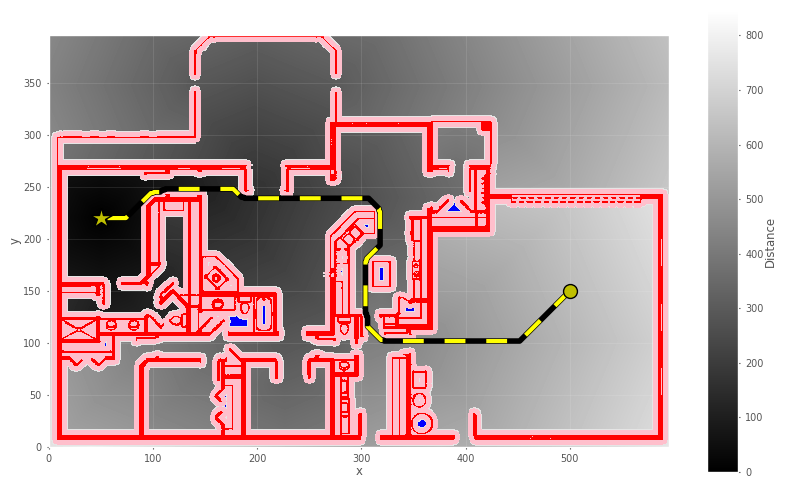

<Figure size 1200x900 with 0 Axes>

<AxesSubplot:xlabel='x (cells)', ylabel='y (cells)'>

In [24]:
'''
Create an instance of DistanceTransformPlanner and plan a path from 'garage' to 'br1' 
and inflate the map by 5 points

Garage to Br1
'''

# the garage array
garage = house['places']['garage']
# Array for Br1
Br1 = house['places']['br1']

# Create an instance of the distance transform planner
## no inflation specified..
dtp = DistanceTransformPlanner(occgrid=og_map,inflate = 5, distance="euclidean")

# Now set the plan
## goal is Br3
dtp.plan(goal=(Br1[0],Br1[1]), animate=False, animate_nb=False)

# Now got the path 
# # Query to add in the starting location as kitchen
## start is the kitchen
path = dtp.query(start = (garage[0],garage[1]))

# Plotted the path
fig,ax = plt.subplots(figsize=(10,8))
dtp.plot(ax=ax, path=path)


## 2: D* planner

A popular algorithm for robot path planning is D* which ﬁnds the best path through a graph. D* generalizes the occupancy grid to a cost map which represents the cost of traversing each cell, $c \in \mathbb{R}, c>0$ to traverse the cell horizontally or vertically. To tracerse the cell diagonally, the costs are $c\sqrt{2}$ and an obstacle has a cost $c=\infty$. 

D* allows incremental replanning, so a robot can dynamically change its path based on new information about its environment. 

D* ﬁnds the path which minimizes the total cost of travel.  If we are interested in the shortest time to reach the goal then cost is the time to drive across the cell. If we are interested in minimizing damage to the vehi- cle or maximizing passenger comfort then cost might be related to the roughness of the terrain within the cell. 
  
To navigate with the D* planner, we can use the [DstarPlanner](https://petercorke.github.io/robotics-toolbox-python/mobile_planner.html?highlight=polygonmap#roboticstoolbox.mobile.DstarPlanner) class.  


In [25]:
# Imports
from scripts.DstarPlanner import DstarPlanner

The D* planner converts the occupancy grid into a cost map, which we can retrieve. Note, in the code below, all occupied cells have a value `inf` and the free celss have a value of 1.0. Later, we will change the costs.

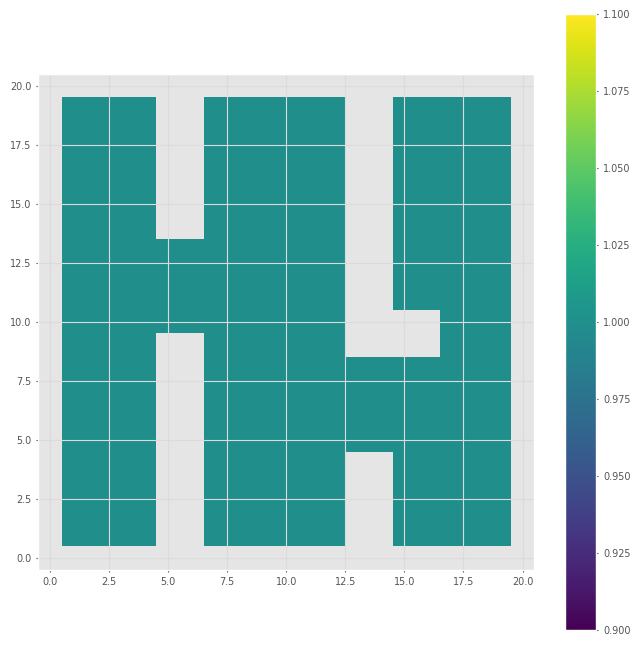

In [26]:
dsp = DstarPlanner(occgrid=og_map_sim.grid)

# Visualize the costmap
costmap = dsp.costmap
plt.figure(figsize=(8,8))
plt.imshow(costmap, origin='lower')
plt.colorbar()
plt.show()

# All these cells are free so 1...

With `dsp.plan(goal)`, the method creates a dense directed graph. Every cell is a graph vertex and has a cost, a distance to the goal, and a link to the neighboring cell that is closest to the goal. Each cell also has a state t ∈ {NEW, OPEN, CLOSED}. Initially every cell is in the NEW state, the cost of the goal cell is zero and its state is OPEN. We can consider the set of all cells in the OPEN state as a wavefront propagating outward from the goal. The cost of reaching cells that are neighbors of an OPEN cell is computed and these cells in turn are set to OPEN and the original cell is removed from the open list and becomes CLOSED. This is similar to what we observed for the distance-transform planner, but the implementation is more efficient.

**Exercise:**
* Run the code below. `dsp.plan(goal)` constructs the graph and calculates the cost for every cell to travel to the goal location. The `travel_costmap` is then shown. 

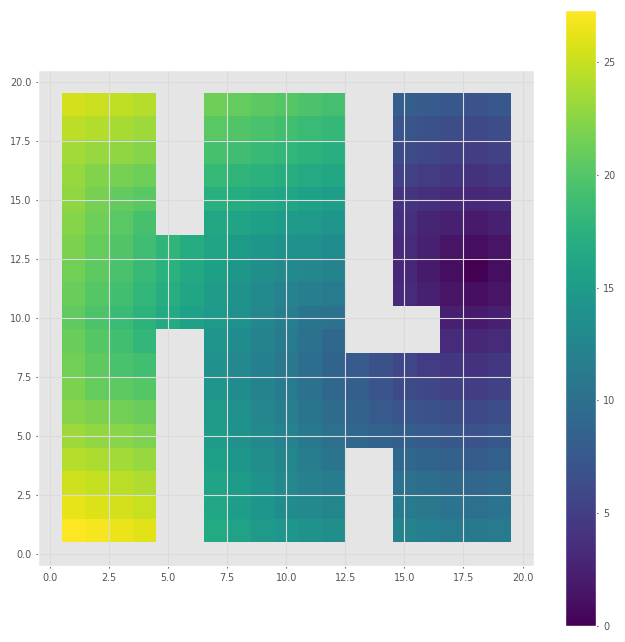

In [27]:
# Compute the D* costmap from a goal position
dsp.plan(goal=(18,12))

# Get the travel costmap indicating the total cost to
# drive to the goal for all cells in the plot
travel_costmap = dsp._Map.get_h()

plt.figure(figsize=(8,8))
plt.imshow(travel_costmap, origin='lower')
plt.colorbar()
plt.show()

Using this graph, the function `dsp.query(start)` plans the shortest path through the graph. It starts at the start position and it then simply uses the constructed graph to move to the neighbor with the lowest travel cost until the goal is reached.

**Exercise:**
* Run the code below to plan a path from (2,2) to (18,12).
* Compare it to the path that you got from the distance-transform planner

Total cost of the planned path: 25.89949493661167


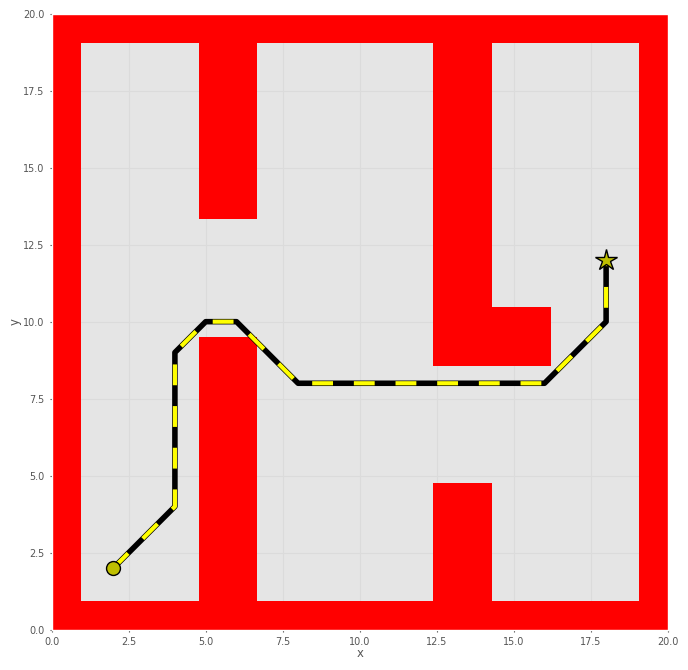

<Figure size 1200x900 with 0 Axes>

<AxesSubplot:xlabel='x (cells)', ylabel='y (cells)'>

In [28]:
# Compute the D* costmap from a goal position
dsp.plan(goal=(18,12))

# Find the shortest path from start to goal
## gets the path and the status
path, status = dsp.query(start=(2,2))

# using status you are able to get the cost of the path for the robot
print("Total cost of the planned path:",status.cost)
fig,ax = plt.subplots(figsize=(8,8))
dsp.plot(ax=ax, path=path)

Different from the distance-transform planner, the D* planner can put different costs to travers different parts of the environment. Until now, we used a binary occupancy map, with associated costs of infinity for the obstacles and fixed costs of 1 to travers the empty space. However, in a real environment, some parts of the environment might be easier to travers than others. Think for instance of the difference between a concrete path, a grass field, or a muddy/sandy part of the field.

We can set arbitrary costmaps to the planner.

**Exercise:**
* Below, an example is provided where part of the empty space in the environment gets a higher cost (=10). Run the code and observe the planned path.
* Lower the cost of traversing the part in the middle. At which costs does the path go around/over the part?

27.55634918610405


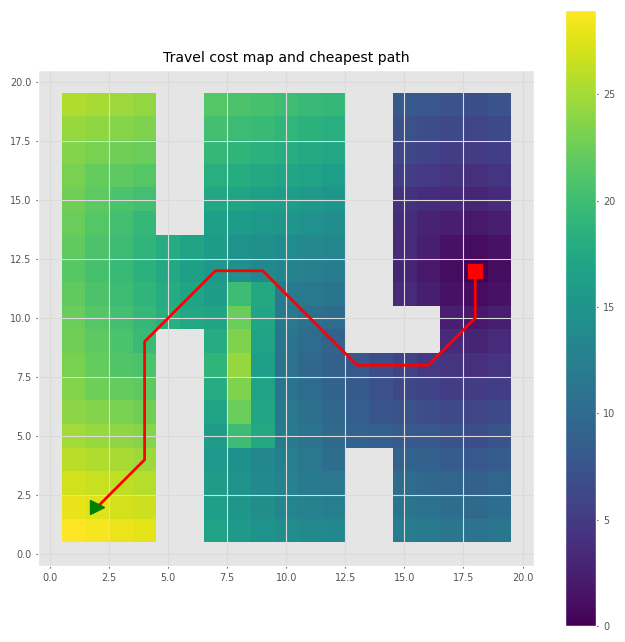

In [29]:
### Create the costmap
# First set occupied space with infinite costs and the rest with cost of 1
costmap = np.where(og_map_sim.grid > 0, np.inf, 1)
# Second, modify the costmap and increase the cost in one part
## HIGH COST IN THE MIDDLISH AREA OF THE MAP...
costmap[5:12, 8:10] = 10

### Plan a path
dsp = DstarPlanner(costmap=costmap, occgrid=og_map_sim.grid)
# Compute the D* costmap from a goal position
dsp.plan(goal=(18,12))
# Find the shortest path from start to goal
path, status = dsp.query(start=(2,2))

print(status.cost)
# Plot the cheapest path on top of the travel cost map
travel_costmap = dsp._Map.get_h()
plt.figure(figsize=(8,8))
plt.imshow(travel_costmap, origin='lower')
plt.plot(path[:,0],path[:,1],'r-',linewidth=2)
plt.plot(path[0,0],path[0,1],'g>',markersize=10)
plt.plot(path[-1,0],path[-1,1],'rs',markersize=10)
plt.title("Travel cost map and cheapest path")
plt.colorbar()
plt.show()

So the robot accounts for this area of high cost and goes around it. So if this was some sort of muddy area or an area of carpet then it goes 
around to accomplish its task more efficiently

It was found the cost for if the middle area is 2 or greater is the same (aroind 27.566) 

The real power of D* comes from being able to efficiently change the cost map during the mission. This is actually quite a common requirement in robotics since real sensors have a finite range and a robot discovers more of world as it proceeds. 

In the code below, we added a function `sensorfunc(pos)`, which mimics that the robot at certain points in the map gets additional information that requires to change the costs to travers certaint cells. In the example, at potion (7,9), the robot encounters that the cells at $x\in[9,10)$ and  $y\in[5,12)$ are less traversable, so that the costs are changed to 10. A real-world example could be that there is a carpet in the room, which would slow down the robot's movement, so it is better to plan around it.

When the costs are changed, the graph is internally updated for only those cells on which it has effect, which makes it efficient.

**Exercise:**
* Run the code and observe how the path is now changed
* Lower the cost for traversing the are. At some point, it will be cheaper to plan a path through the area than to plan a path around the area


propagate


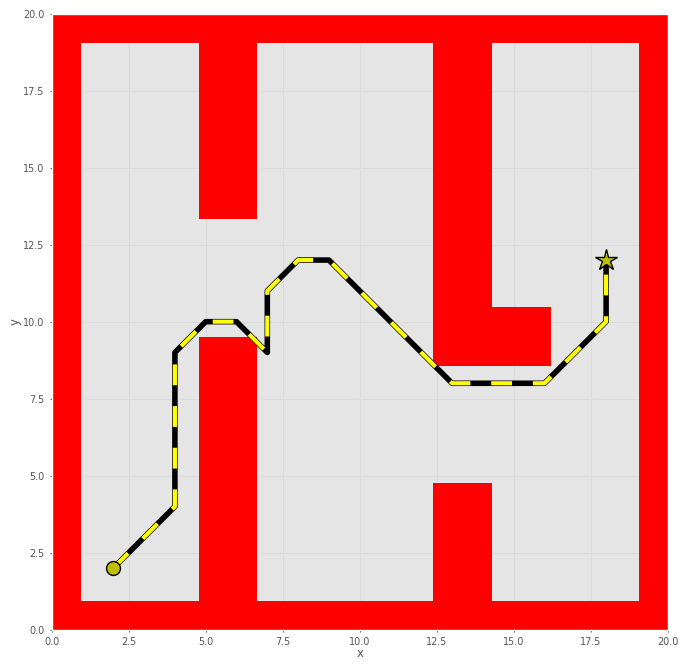

<Figure size 1200x900 with 0 Axes>

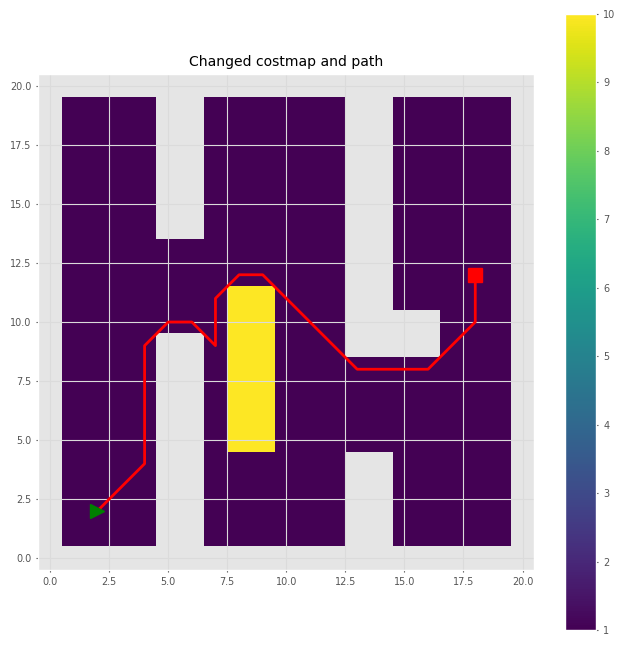

In [30]:
# Need to change from 7,8 to 7,9 so the pos is along the path
def sensorfunc(pos):
    if pos == (7,9):
        changes = []
        for y in range(5,12):
            for x in range(8,10):
                changes.append((x, y, 10))
        return changes

dsp = DstarPlanner(occgrid=og_map_sim.grid)
# Compute the D* costmap from a goal position
dsp.plan(goal=(18,12))

# Find the shortest path from start to goal including a sensor simulation
path, status = dsp.query(start=(2,2), sensor=sensorfunc)
#path, status = dsp.query(start=(2,2))

fig,ax = plt.subplots(figsize=(8,8))
dsp.plot(ax=ax, path=path)
plt.show()

# Visualize the costmap
costmap = dsp.costmap
plt.figure(figsize=(8,8))
plt.imshow(costmap, origin='lower')
plt.plot(path[:,0],path[:,1],'r-',linewidth=2)
plt.plot(path[0,0],path[0,1],'g>',markersize=10)
plt.plot(path[-1,0],path[-1,1],'rs',markersize=10)
plt.title("Changed costmap and path")
plt.colorbar()
plt.show()


**Exercise:**
* Now, it is your task to take the big map `og_map` and to plan a path from 'kitchen' to 'br3'.  



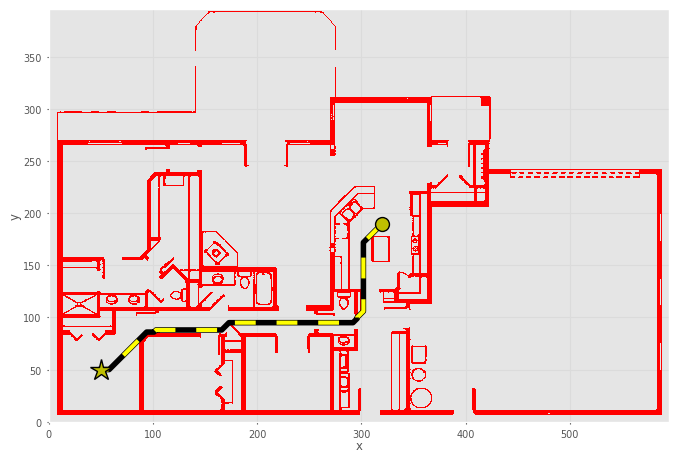

<Figure size 1200x900 with 0 Axes>

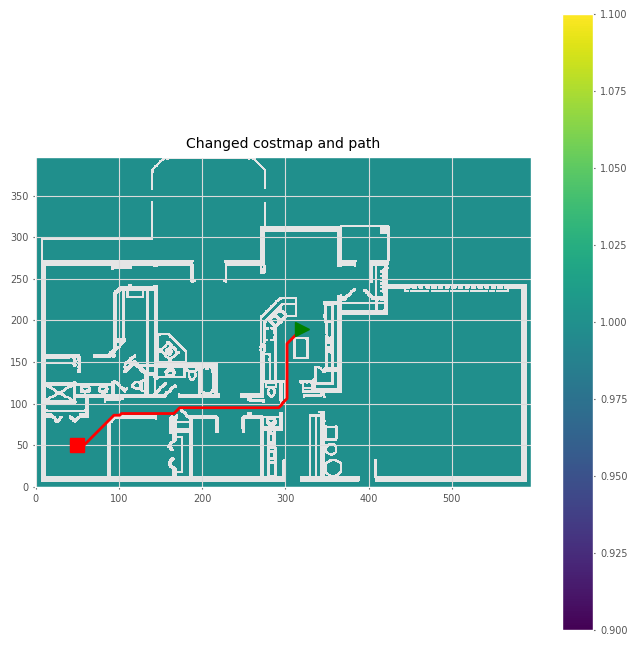

In [31]:
'''
Create an instance of DstarPlanner and plan a path from 'kitchen' to 'br3'.
'''

# the kitchen array
kitchen = house['places']['kitchen']
# Array for Br3
Br3 = house['places']['br3']

# initialize Dstar
dsp = DstarPlanner(occgrid=og_map.grid)

# plan the path
dsp.plan(goal=(Br3[0],Br3[1]))

# get the path and status
## add the start 
path, status = dsp.query(start = (kitchen[0],kitchen[1]))

# plot
fig,ax = plt.subplots(figsize=(8,8))
dsp.plot(ax=ax, path=path)
plt.show()

# Visualize the costmap
costmap = dsp.costmap
plt.figure(figsize=(8,8))
plt.imshow(costmap, origin='lower')
plt.plot(path[:,0],path[:,1],'r-',linewidth=2)
plt.plot(path[0,0],path[0,1],'g>',markersize=10)
plt.plot(path[-1,0],path[-1,1],'rs',markersize=10)
plt.title("Changed costmap and path")
plt.colorbar()
plt.show()


There are a few downsides of the distance-map planner and the D* planner:
* The planning phase is computationally expensive, which is especially problematic for larger environments
* Planning has to be redone from scratch if the goal changes. 


In the following, we will have a look at a few roadmap-based planning methods. These methods abstract the map to a graph consisting of a set of connected nodes. 

## 3: Probabilistic roadmap method (PRM) planner

The Probabilistic Roadmap Method (PRM) selects a random set of points in the free parts of the map as nodes of a graph. Nodes that allow collision free navigation between them are then connected to form the edges of the graph.

**Exercise**
* The code below is loading the PRMPlanner and applies it to our simple map, selecting 100 random points. Run the code
* Look at the results. Are all parts of the environemnt connected? 
* What happens if you run the code for a second time? Do you get the same graph?
* What happens if you select fewer points? At which number of points is the map not well represented anymore by the graph? You can see disconnections in the graph if there are different colored nodes.



In [32]:
# Imports
from scripts.PRMPlanner import PRMPlanner

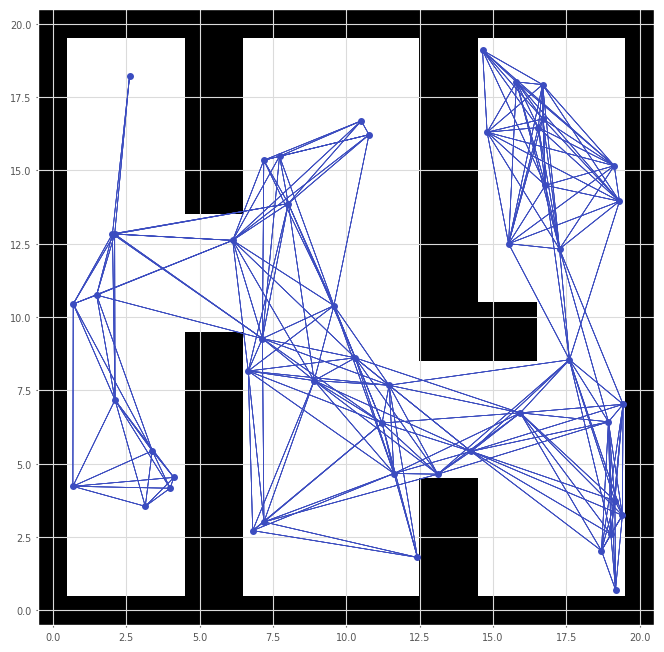

In [65]:
prm = PRMPlanner(occgrid=og_map_sim.grid)

# Create a graph for the probabilistic roadmap with 250 random points
prm.plan(npoints=50)

# Visualize the probabilistic roadmap graph
fig,ax = plt.subplots(figsize=(8,8))
plt.imshow(prm.occgrid.grid, cmap='binary', origin="lower")
prm.plot_graph(ax=ax)

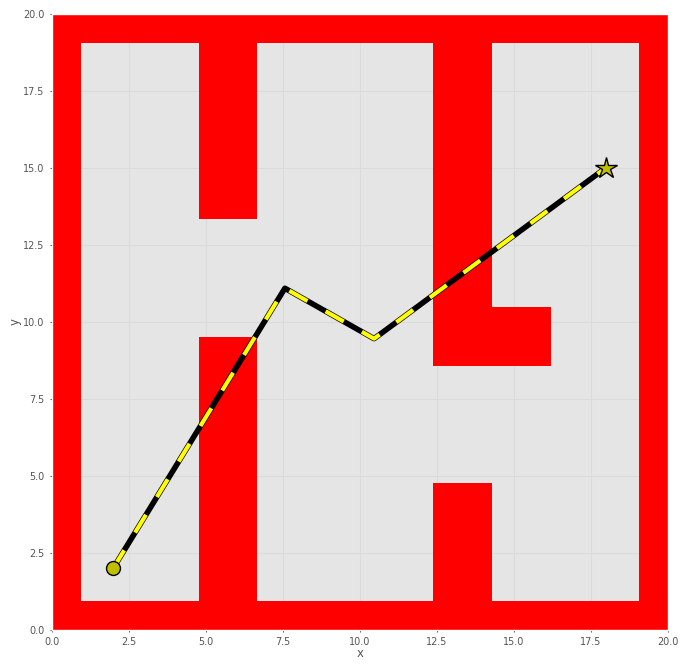

<Figure size 1200x900 with 0 Axes>

In [57]:
path = prm.query(start=(2,2), goal=(18,15))

fig,ax = plt.subplots(figsize=(8,8))
prm.plot(ax=ax, path=path)
plt.show()

If you run it again you will not get the same path

When you select fewer points it doesn't necesssarily lead to all of the points being able to be connected...

When lots of points it is computationally intenstive to find all of the paths

So when there are roughly 50 points this is when there is an inflection point and where you might see multiple clusters instead of one large cluster indicating that not all the points are able to be connected to one another. indicating disconnections...



Although the planning of the graph is computationally expensive, the advantage is that once calculated for the environment, it is cheap to plan several routes for the robot. See the following example, where three consecutive paths are planned:

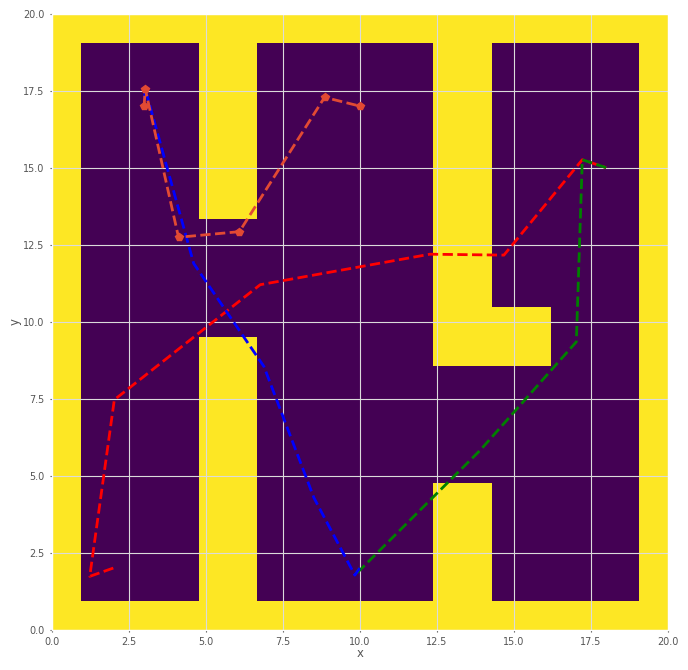

In [35]:
path1 = prm.query(start=(2,2), goal=(18,15))
path2 = prm.query(start=(18,15), goal=(10,2))
path3 = prm.query(start=(10,2), goal=(3,17))
path4 = prm.query(start=(3,17), goal=(10,17))

fig,ax = plt.subplots(figsize=(8,8))
plt.plot(path[:,0], path[:,1], 'r--', linewidth=2)
plt.plot(path2[:,0], path2[:,1], 'g--', linewidth=2)
plt.plot(path3[:,0], path3[:,1], 'b--', linewidth=2)
plt.plot(path4[:,0], path4[:,1], 'p--', linewidth=2)
og_map_sim.plot(ax=ax)
plt.show()

**Exercise:**
* Use the PRM planner on the `og_map` floormap to navigate from `kitchen` to `br3`. Note that you need more points for a larger environment. If no path can be found, you will get an error message.
* Find a path from 'garage' to 'br1'.
* Compare the paths to those from the Distance Transform and D* planners. What do you see as differences? 

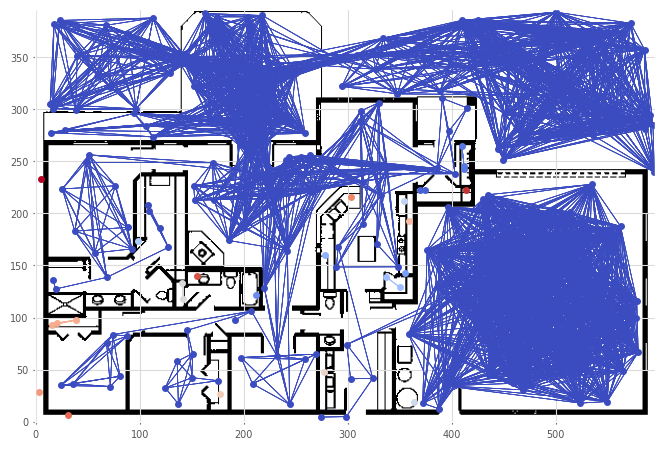

In [80]:
'''
Create an instance of PRMPlanner and plan a path from 'garage' to 'br3'.
Note: If a path is not found in the first attempt, rerunning the code helps since the PRM planner depends on random sampling of points.
'''

### Add your code here ###

# initialized the planner
prm = PRMPlanner(occgrid=og_map.grid)

# Create a graph for the probabilistic roadmap with 250 random points
prm.plan(npoints=250)
fig,ax = plt.subplots(figsize=(8,8))
plt.imshow(prm.occgrid.grid, cmap='binary', origin="lower")
prm.plot_graph(ax=ax)
#



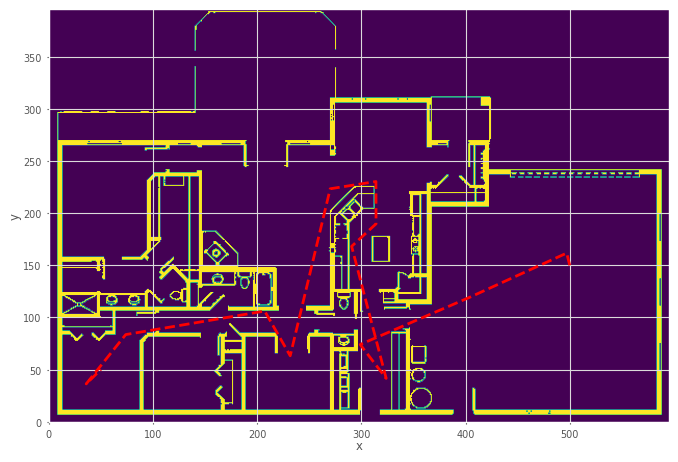

In [81]:
# Make the path going from kitchen to Br3
# the kitchen array
garage = house['places']['garage']
# Array for Br3
Br3 = house['places']['br3']
path = prm.query(start=(garage[0],garage[1]), goal=(Br3[0],Br3[1]))

# Plot the path on the map
fig,ax = plt.subplots(figsize=(8,8))
plt.plot(path[:,0], path[:,1], 'r--', linewidth=2)
og_map.plot(ax=ax)
plt.show()

## 4: Lattice planner

The planners discussed so far have generated paths independent of the motion that the vehicle can actually achieve, and we learned in Chap. 4 that wheeled vehicles have significant motion constraints. Notably, that they cannot move sideways and that they cannot immediately achieve a given heading. So some of the planned paths, might not be feasible for the robot to execute.

An alternative is to design a path from the outset that we know the vehicle can follow, and to take also the heading of the robot into account.

The lattice planner assumes that the robot is at some position with some heaing and that it can drive forward to reach three points, one straight ahead, one with an arc to the left and one with an arc to the right. These three motions are called **motion primitives**. From each of the three resulting poses, the robot can reach three new poses in the second step, expanding the lattice to 9 poses. This can iteratively be repeated to get a lattice that the planner can use.

**Exercise:**
* The code below starts the proces to get the lattice from pose (10,10,0) and runs it for 1 iteration. Run the code and observe the results.
* Increase the number of iterations to see how the lattice is covering the enironment.
* Remove `iterations = ...` from `lat.plan()` to plan until the whole map is filled.

In [82]:
# Imports
from scripts.LatticePlanner import LatticePlanner

finished after 20 iterations


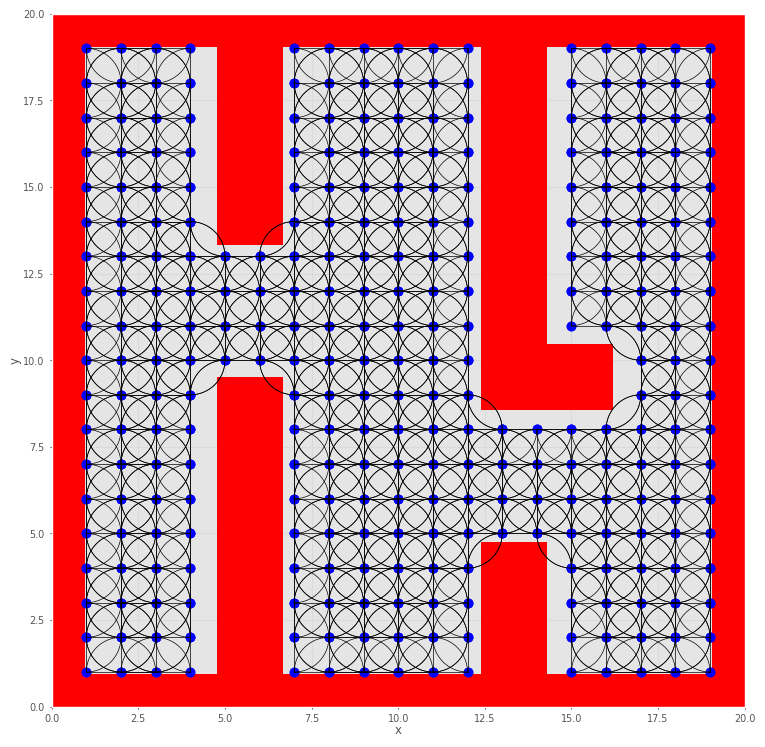

<Figure size 1200x900 with 0 Axes>

In [87]:
# Create an instance of the Lattice planner
# Pass the simple occupancy grid created in Section 0.2 as argument
lat = LatticePlanner(occgrid=og_map_sim.grid, root=(10,10,0));

# Generate lattice paths
lat.plan()

# Visualize the lattice
lat.plot()

Like with the PRM planner, the planning phase takes time, but once the lattice is calculated for the complete map, we can easily plan paths between any start and goal pose.

**Exercise:**
* Run the code below to plan a path from $(2,2,\frac{1}{2}\pi)$ to $(17,15,-\frac{1}{2}\pi)$
* Try a few other start and end poses.
* What do you think of the generated paths? Are they feasible to drive with a car-like and differemtial-drive robot?
* Note that most of the computation time is in the plotting. The querying of a path is very fast.

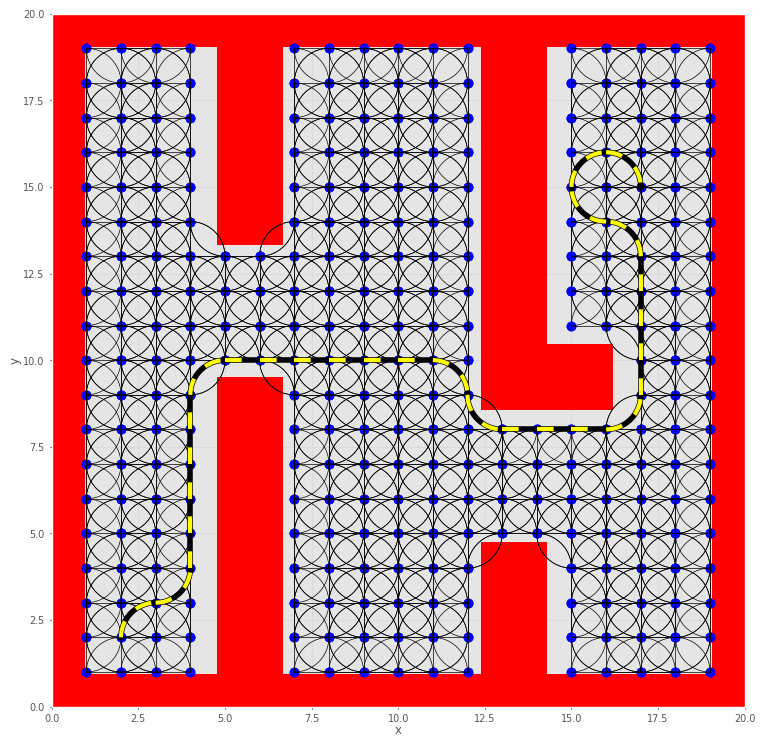

<Figure size 1200x900 with 0 Axes>

In [90]:
path, status = lat.query(start=(2, 2, np.pi/2), goal=(17, 15, -np.pi/2))

# If you want some information about the path
#print(status)

# Plotting the path
lat.plot(path=path)

Yes these paths make it feasible for a differential drive or car like robot
There would need to be a very sharp change in steering anlge at time but there will not be a need for a high velocity change

diagonal paths arent handled well.. due to use of cuves
 

## 5: Rapidly-Exploring Random Tree (RRT) planner

The final planner that we introduce is also able to take into account the motion model of the vehicle. Unlike the lattice planner which plans over a regular grid, the RRT uses probabilistic methods like the PRM planner. 

The RRT planner starts from the goal pose and works its way backwards to explore the space iteratively. 
1. At every iteration, a random pose, $r_{rand}$ in the map is selected. The nearest pose already in the tree is selected and a path from that existing pose towards the random pose is determined using the vehicle model. 
2. This path is also found randomly, by trying different random steering angles and directions of motion (forward and backwards) and chosing the control that brings the robot closest to the random pose. 
3. The pose that it then reaches is $q_{near}$, which is added to the tree if the path is obstacle free
4. 1-2 are repeated for $n$ number of points 

Refer to Section 5.2.6 in the textbook for details about the planner.

To navigate with the RRT planner, we can use the [RRTPlanner](https://petercorke.github.io/robotics-toolbox-python/mobile_planner.html?highlight=polygonmap#roboticstoolbox.mobile.RRTPlanner) class.


**Exercise:**
* The RRT planner needs a polygon map. Below, you get some code to create our small map as polygon map. Run it


In [91]:
# Imports
from scripts.RRTPlanner import RRTPlanner
from roboticstoolbox import Bicycle
from spatialmath import Polygon2

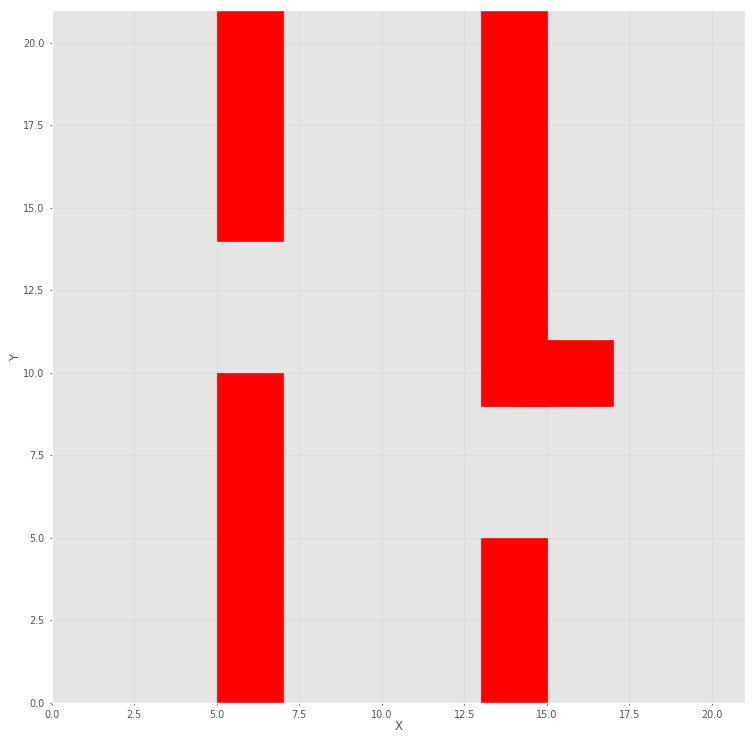

In [92]:
poly_map = PolygonMap(workspace=[0, 21], polygons=[])

poly_map.add([[5,0],[7,0],[7,10],[5,10]])
poly_map.add([[5,14],[7,14],[7,21],[5,21]])
poly_map.add([[13,0],[15,0],[15,5],[13,5]])
poly_map.add([[13,9],[15,9],[15,21],[13,21]])
poly_map.add([[14,9],[17,9],[17,11],[14,11]])
poly_map.plot()

**Exercise:**
* Below is code to create a RRT-tree for goal pose $(19,14,\frac{1}{2}\pi)$. 
* A bicycle model is use. Check which parameters are used for the model
* Run the code and check the resulting poses in the tree.
* Run also the next code block to plan a path from start pose $(2,2,\frac{1}{2}\pi)$. 
* Increase `npoints` for `RRTPlanner(...)` to create a more dense tree.


curvature 1.0


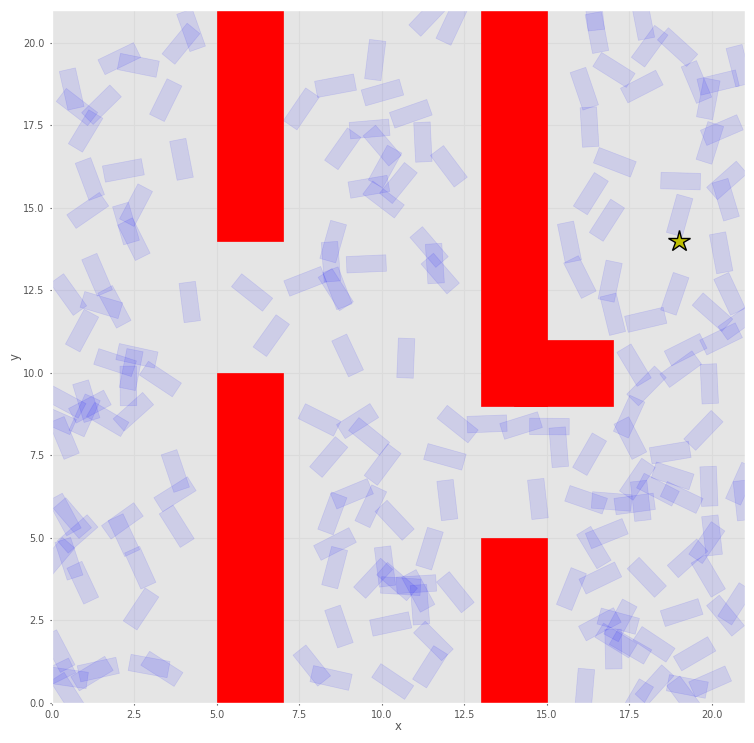

In [95]:
'''
Create an instance of RRTPlanner and plan a path from from (2, 8, np.pi/2) to (8, 2, np.pi/2).
'''

# create outline polygon for vehicle
l, w = 1.2, 0.5
vpolygon = Polygon2([(-l/2, w/2), (-l/2, -w/2), (l/2, -w/2), (l/2, w/2)])
# create vehicle model
vehicle = Bicycle(steer_max=1, L=1, polygon=vpolygon)

### Add your code here ###

# Create an instance of the RRT planner
# Pass the simple polygon map created in Section 0.1 as argument
#rrt = RRTPlanner(map=poly_map, vehicle=vehicle, npoints=50, seed=0)
#rrt = RRTPlanner(map=poly_map, vehicle=vehicle, stepsize=1, npoints=200, seed=0)
rrt = RRTPlanner(map=poly_map, vehicle=vehicle, npoints=200, seed=0)

# Generate graph
rrt.plan(goal=(19, 14, np.pi/2))

# Visualize the rrt graph
rrt.plot()

# raise NotImplementedError
### ------------------ ###

[DVertex[#61, coord=(2.706, 2.84, 0.9855)], DVertex[#58, coord=(0.942, 3.636, -1.132)], DVertex[#55, coord=(2.141, 5.508, -2.522)], DVertex[#51, coord=(3.788, 5.344, 2.132)], DVertex[#45, coord=(3.747, 7.021, 1.897)], DVertex[#33, coord=(2.409, 10.09, 1.376)], DVertex[#29, coord=(6.654, 11.12, 0.9508)], DVertex[#21, coord=(10.73, 10.44, -1.611)], DVertex[#19, coord=(11.91, 7.449, -0.2733)], DVertex[#12, coord=(15.08, 8.368, -0.006225)], DVertex[#5, coord=(17.53, 8.018, -1.096)], DVertex[#3, coord=(20.89, 6.635, -1.994)], DVertex[#1, coord=(19.93, 9.661, 1.619)], DVertex[#0, coord=(19, 14, 1.571)]]


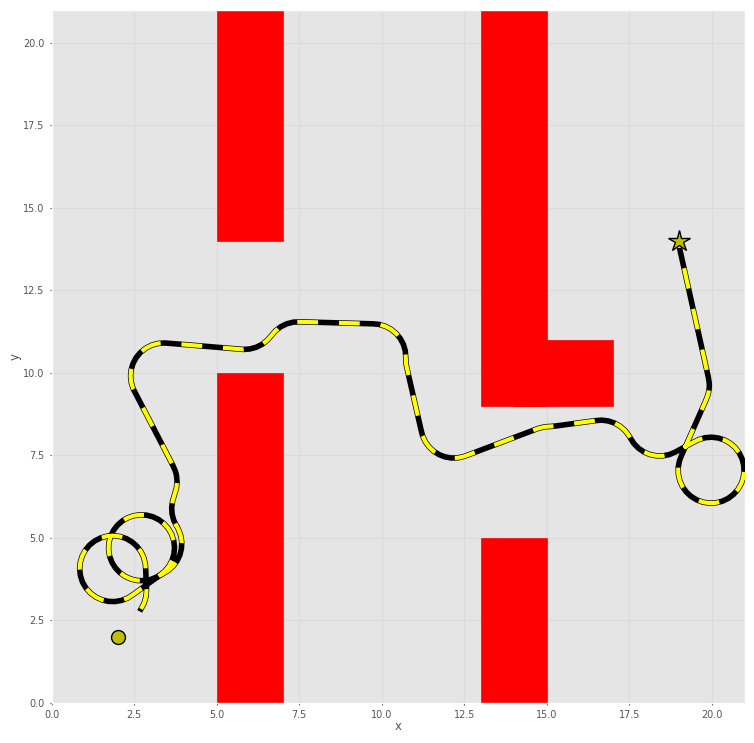

In [96]:
### Add your code here ###
# Find a path from a start position to the goal position
path, status = rrt.query(start=(2, 2, np.pi/2))

# raise NotImplementedError
### ------------------ ###
#print(status)
rrt.plot(path=path)